In [6]:
import sys
import warnings
warnings.filterwarnings('ignore')


# hpbandster
import pickle
import hpbandster.core.nameserver as hpns
import hpbandster.core.result as hpres
import hpbandster.visualization as hpvis
from hpbandster.optimizers import HyperBand
from hpbandster.core.worker import Worker
import ConfigSpace as CS
import ConfigSpace.hyperparameters as CSH
#
import logging

import argparse
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd

In [12]:
folders=glob.glob('*/')
folders

['group_5/',
 'rbpj/',
 'notch2/',
 'group_1/',
 'group_3/',
 'group_6/',
 'group_4/',
 'group_2/',
 'notch1/']

In [16]:
result_path=os.path.join(root,folder)
result = hpres.logged_results_to_HBS_result(result_path)
all_runs = result.get_all_runs()
id2conf = result.get_id2config_mapping()

# get incumbent id
inc_id = result.get_incumbent_id()

# get incumbent run and the version with largest budget
inc_runs = result.get_runs_by_id(inc_id)
inc_run = inc_runs[-1]


# get loss and config
#optimization, and all the additional information
hyperband_loss=inc_run.loss
inc_config = id2conf[inc_id]['config']
# get metric details
train_loss_hist=inc_run.info['loss_hist']
accuracy_hist=inc_run.info['accuracy_hist']
val_loss_hist=inc_run.info['val_loss_hist']
val_acc_hist=inc_run.info['val_acc_hist']
val_loss=inc_run.info['val_loss']
val_acc=inc_run.info['val_acc']
epochs=inc_run.info['epochs']
early_stop=inc_run.info['early_stop']

/users/PCCH0011/cch0017/PROJECTS/Rafi_dynamic_site_prediction_2020/__Hyperparameter_Search__/__HP_PARAM_OPTIM_RUN__/group_5/
/users/PCCH0011/cch0017/PROJECTS/Rafi_dynamic_site_prediction_2020/__Hyperparameter_Search__/__HP_PARAM_OPTIM_RUN__/rbpj/
/users/PCCH0011/cch0017/PROJECTS/Rafi_dynamic_site_prediction_2020/__Hyperparameter_Search__/__HP_PARAM_OPTIM_RUN__/notch2/
/users/PCCH0011/cch0017/PROJECTS/Rafi_dynamic_site_prediction_2020/__Hyperparameter_Search__/__HP_PARAM_OPTIM_RUN__/group_1/
/users/PCCH0011/cch0017/PROJECTS/Rafi_dynamic_site_prediction_2020/__Hyperparameter_Search__/__HP_PARAM_OPTIM_RUN__/group_3/
/users/PCCH0011/cch0017/PROJECTS/Rafi_dynamic_site_prediction_2020/__Hyperparameter_Search__/__HP_PARAM_OPTIM_RUN__/group_6/
/users/PCCH0011/cch0017/PROJECTS/Rafi_dynamic_site_prediction_2020/__Hyperparameter_Search__/__HP_PARAM_OPTIM_RUN__/group_4/
/users/PCCH0011/cch0017/PROJECTS/Rafi_dynamic_site_prediction_2020/__Hyperparameter_Search__/__HP_PARAM_OPTIM_RUN__/group_2/
/use

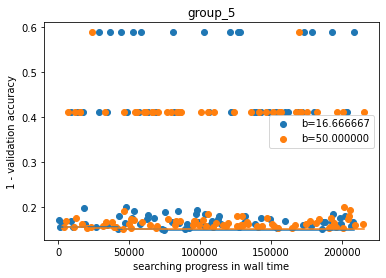

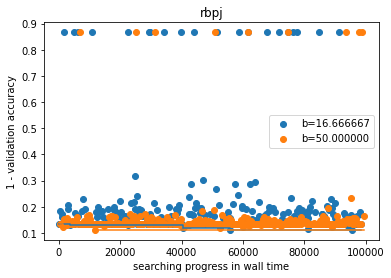

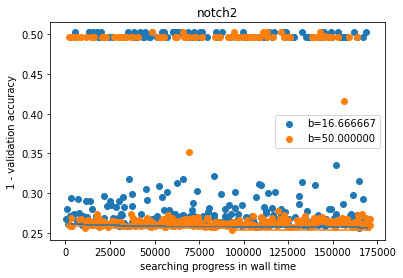

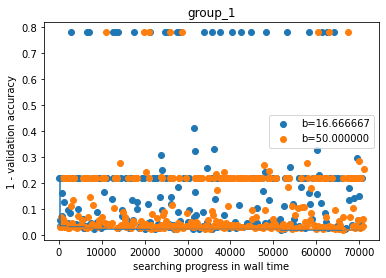

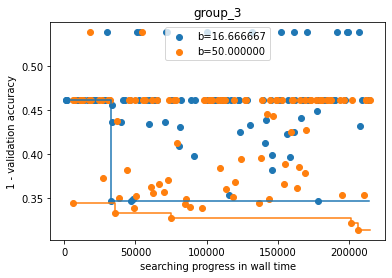

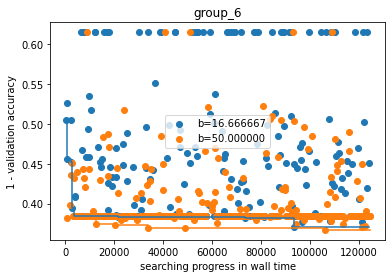

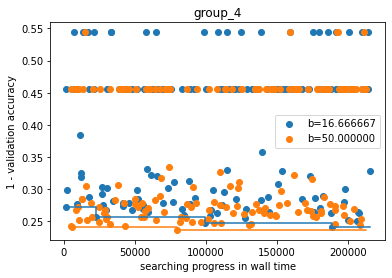

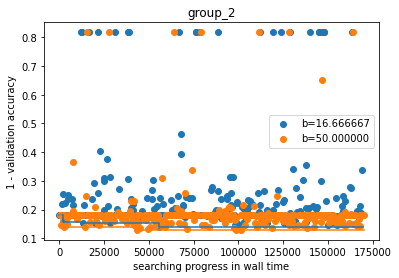

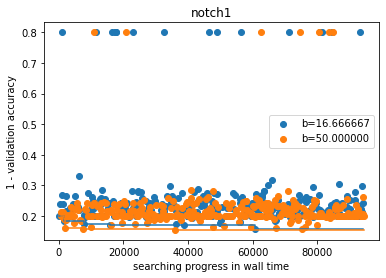

In [46]:
# load the log files

model_df={}

root='/users/PCCH0011/cch0017/PROJECTS/Rafi_dynamic_site_prediction_2020/__Hyperparameter_Search__/__HP_PARAM_OPTIM_RUN__'
for folder in folders: 

    result_path=os.path.join(root,folder)
    print(result_path)
    result = hpres.logged_results_to_HBS_result(result_path)
    
    # get all executed runs and config mapping
    all_runs = result.get_all_runs()
    id2conf = result.get_id2config_mapping()

    # get incumbent id
    inc_id = result.get_incumbent_id()

    # get incumbent run and the version with largest budget
    inc_runs = result.get_runs_by_id(inc_id)
    inc_run = inc_runs[-1]


    # get loss and config
    #optimization, and all the additional information
    hyperband_loss=inc_run.loss
    inc_config = id2conf[inc_id]['config']

    # get metric details
    train_loss_hist=inc_run.info['loss_hist']
    accuracy_hist=inc_run.info['accuracy_hist']
    val_loss_hist=inc_run.info['val_loss_hist']
    val_acc_hist=inc_run.info['val_acc_hist']
    val_loss=inc_run.info['val_loss']
    val_acc=inc_run.info['val_acc']
    epochs=inc_run.info['epochs']
    early_stop=inc_run.info['early_stop']
    
  
#     print('Best found configuration:')
#     print(inc_config)
#     print()
    model_df[folder]=inc_config
#     print('It achieved accuracies of {} (training) and {} (validation) in {} epochs.'.format(
#         accuracy_hist[-1], valid_acc,epochs))

#     fig,axs=plt.subplots(1,2,figsize=(10,5))

#     axs[0].scatter(list(range(len(train_acc))),train_acc,label='training acc')
#     axs[0].scatter(len(train_acc),valid_acc,label='best validation acc')
#     axs[0].legend()
#     axs[0].set_xlabel('Epochs')
#     axs[0].set_ylabel('Accuracy')

#     axs[1].scatter(list(range(len(train_loss))),train_loss,label='training loss')
#     axs[1].scatter(len(train_loss),valid_loss,label='validation loss')
#     axs[1].legend()
#     axs[1].set_xlabel('Epochs')
#     axs[1].set_ylabel('BCE loss')
    #plt.savefig('training_validation_acc_loss_{}.pdf'.format(folder),bbox_inches='tight')

    # Let's plot the observed losses grouped by budget,
    #fig,axs=plt.subplots(figsize=(10,5))
    hpvis.losses_over_time(all_runs)
    plt.title(folder.rstrip('/'))
    plt.xlabel('searching progress in wall time')
    plt.ylabel('1 - validation accuracy')
    plt.savefig('{}.pdf'.format(folder.rstrip('/')),bbox_inches='tight')

    # the number of concurent runs,
    #hpvis.concurrent_runs_over_time(all_runs)

    # and the number of finished runs.
    #hpvis.finished_runs_over_time(all_runs)
    #plt.savefig('completed_runs_#_v{}.pdf'.format(run_number),bbox_inches='tight')

    # This one visualizes the spearman rank correlation coefficients of the losses
    # between different budgets.
    # hpvis.correlation_across_budgets(result)

    # For model based optimizers, one might wonder how much the model actually helped.
    # The next plot compares the performance of configs picked by the model vs. random ones
    # hpvis.performance_histogram_model_vs_random(all_runs, id2conf)



In [39]:
model_df_df=pd.DataFrame.from_dict(model_df,orient='index')

In [48]:
model_df_df.to_csv('best_configuration.csv',sep=',',header=True,index=True)